In [77]:
from keys import oai_key, anthropic_key
from openai import OpenAI
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import anthropic
import pandas as pd

client = OpenAI(api_key=oai_key)
anthropic_client = anthropic.Anthropic(api_key=anthropic_key)

In [8]:
from tqdm import tqdm


responses = []
for i in tqdm(range(860)):
    response = client.chat.completions.create(
      model="gpt-4o",
      messages=[
        {"role": "user", "content": """Pick a random number from 0 to 10. Only return the number nothing else."""},
      ]
    )
    responses.append(response)

100%|██████████| 860/860 [06:36<00:00,  2.17it/s]


In [79]:
gpt_4o_df = pd.DataFrame(responses)
gpt_4o_df.to_csv("gpt_4o.csv", index=False)

In [13]:
random_numbers_oaat = [int(rsp.choices[0].message.content) for rsp in responses]

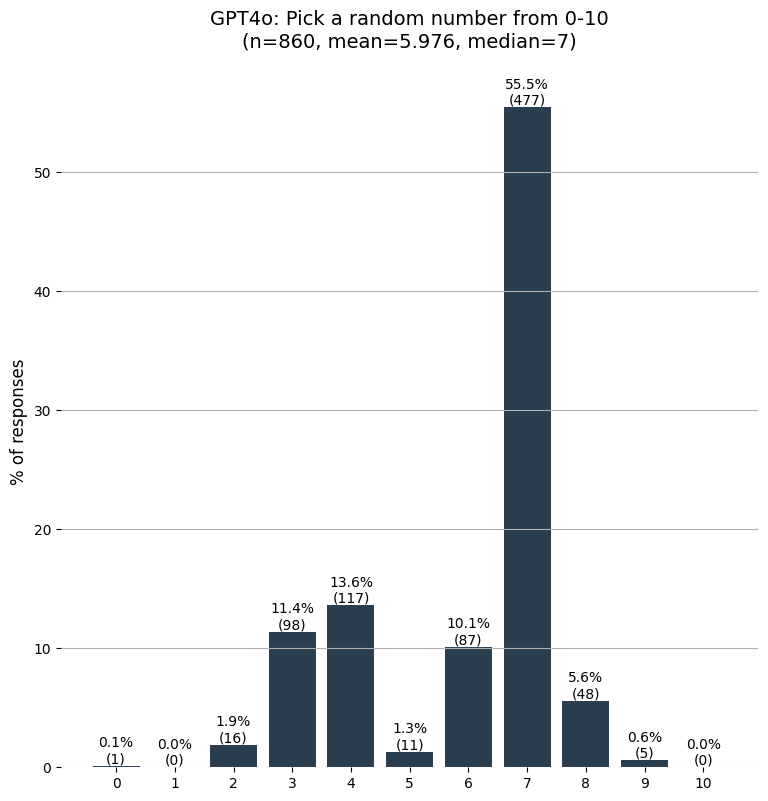

In [74]:
import matplotlib.pyplot as plt
from collections import Counter


# Count the occurrences of each number
counts = Counter(random_numbers_oaat)

# Add missing numbers to the counts
for i in range(11):
    if not counts.get(i):
        counts[i] = 0

# Sort the counts by key (number)
sorted_counts = dict(sorted(counts.items()))

# Normalize the counts to get percentages
total_count = sum(sorted_counts.values())
percentages = {k: (v / total_count) * 100 for k, v in sorted_counts.items()}

# Plot the histogram
plt.figure(figsize=(9, 9))
bars = plt.bar(list(percentages.keys()), list(percentages.values()), color='#2A3E50')  # Dark blue color

# Adding text labels on the bars
for bar in bars:
    height = bar.get_height()
    number = int(bar.get_x() + bar.get_width() / 2.0)  # Calculate the corresponding number
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, 
             f'{height:.1f}%\n({sorted_counts[number]})', ha='center', va='bottom')


# Setting the formatting to match the provided image
plt.title('GPT4o: Pick a random number from 0-10\n(n={}, mean={}, median={})'.format(
    total_count, round(sum(random_numbers_oaat) / total_count, 3), sorted(random_numbers_oaat)[len(random_numbers_oaat) // 2]), fontsize=14, pad=20)

# Removing the box around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding horizontal grid lines only for the y-axis
plt.gca().yaxis.grid(True)

plt.ylabel('% of responses', fontsize=12)
plt.xlabel('')
plt.xticks(ticks=range(11), labels=range(11))

# Show the plot
plt.show()

In [52]:
from tqdm import tqdm


anthropic_responses = []
for i in tqdm(range(100)):
    anthropic_response = anthropic_client.messages.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens=100,
    temperature=1,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Pick a random number from 0 to 10. Only return the number nothing else."
                }
            ]
        }
    ]
    )

    anthropic_responses.append(anthropic_response)


100%|██████████| 100/100 [19:41<00:00, 11.82s/it]


In [64]:
random_numbers_anthropic_oaat = [int(rsp.content[0].text) for rsp in anthropic_responses]

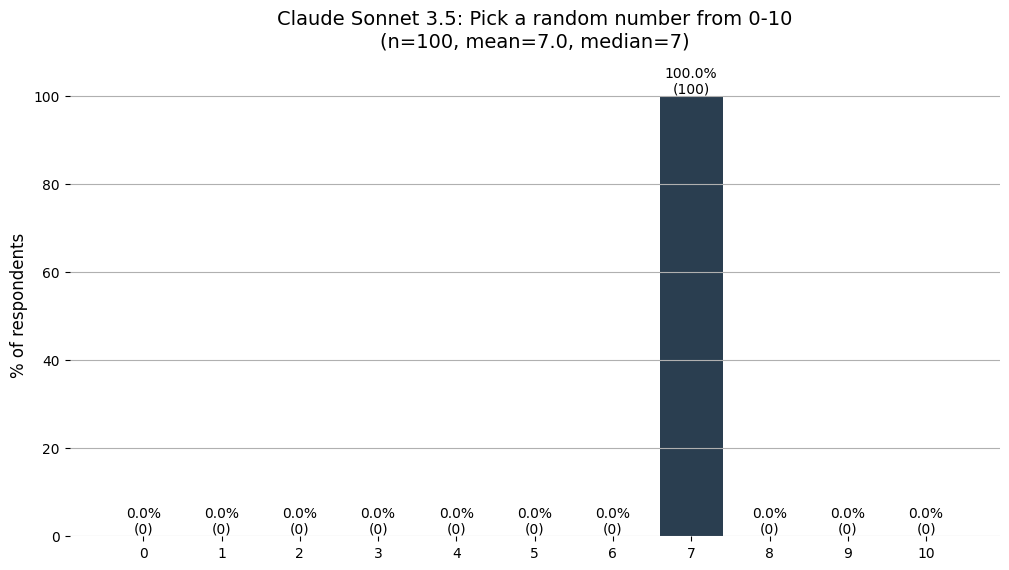

In [67]:
import matplotlib.pyplot as plt
from collections import Counter


# Count the occurrences of each number
ant_counts = Counter(random_numbers_anthropic_oaat)

# Add missing numbers to the counts
for i in range(11):
    if not ant_counts.get(i):
        ant_counts[i] = 0

# Sort the counts by key (number)
sorted_ant_counts = dict(sorted(ant_counts.items()))

# Normalize the counts to get percentages
total_count = sum(sorted_ant_counts.values())
percentages = {k: (v / total_count) * 100 for k, v in sorted_ant_counts.items()}

# Plot the histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(list(percentages.keys()), list(percentages.values()), color='#2A3E50')  # Dark blue color

# Adding text labels on the bars
for bar in bars:
    height = bar.get_height()
    number = int(bar.get_x() + bar.get_width() / 2.0)  # Calculate the corresponding number
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, 
             f'{height:.1f}%\n({sorted_ant_counts[number]})', ha='center', va='bottom')


# Setting the formatting to match the provided image
plt.title('Claude Sonnet 3.5: Pick a random number from 0-10\n(n={}, mean={}, median={})'.format(
    total_count, round(sum(random_numbers_anthropic_oaat) / total_count, 3), sorted(random_numbers_anthropic_oaat)[len(random_numbers_anthropic_oaat) // 2]), fontsize=14, pad=20)

# Removing the box around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding horizontal grid lines only for the y-axis
plt.gca().yaxis.grid(True)

plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('')
plt.xticks(ticks=range(11), labels=range(11))

# Show the plot
plt.show()

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

# Assume random_numbers_oaat is a list of random numbers
# Example: random_numbers_oaat = [7, 5, 7, 8, 7, 6, 4, 6, 7, 5, 3, ...]

# Count the occurrences of each number
counts = Counter(random_numbers_oaat)

# Add missing numbers to the counts
for i in range(11):
    if not counts.get(i):
        counts[i] = 0

# Sort the counts by key (number)
sorted_counts = dict(sorted(counts.items()))

# Normalize the counts to get percentages
total_count = sum(sorted_counts.values())
percentages = {k: (v / total_count) * 100 for k, v in sorted_counts.items()}



1: 0
10: 0


In [28]:
response2 = client.chat.completions.create(
      model="gpt-4o",
      messages=[
        {"role": "user", "content": """Pick 860 random numbers from 0 to 10. Return one random number per line, do not return anything else."""},
      ]
    )

In [38]:
# Random numbers generated all at once
random_numbers_aao = response2.choices[0].message.content.split('\n')

# Keep only the numbers
random_numbers_aao = [int(num) for num in random_numbers_aao if num.isdigit()]

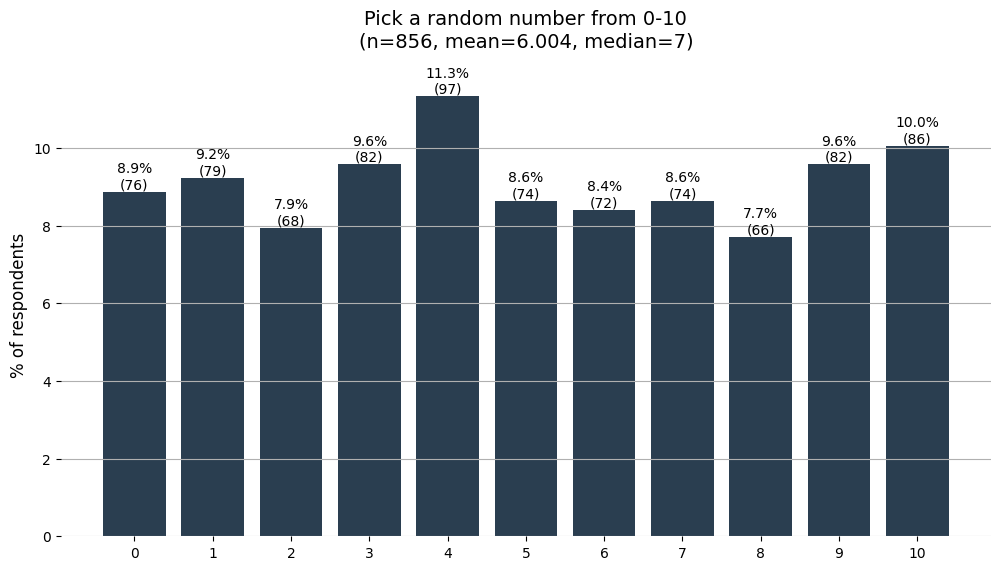

In [39]:
import matplotlib.pyplot as plt
from collections import Counter


# Count the occurrences of each number
counts = Counter(random_numbers_aao)

# Add missing numbers to the counts
for i in range(11):
    if not counts.get(i):
        counts[i] = 0

# Sort the counts by key (number)
sorted_counts = dict(sorted(counts.items()))

# Normalize the counts to get percentages
total_count = sum(sorted_counts.values())
percentages = {k: (v / total_count) * 100 for k, v in sorted_counts.items()}

# Plot the histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(list(percentages.keys()), list(percentages.values()), color='#2A3E50')  # Dark blue color

# Adding text labels on the bars
for bar in bars:
    height = bar.get_height()
    number = int(bar.get_x() + bar.get_width() / 2.0)  # Calculate the corresponding number
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, 
             f'{height:.1f}%\n({sorted_counts[number]})', ha='center', va='bottom')


# Setting the formatting to match the provided image
plt.title('Pick a random number from 0-10\n(n={}, mean={}, median={})'.format(
    total_count, round(sum(random_numbers_oaat) / total_count, 3), sorted(random_numbers_oaat)[len(random_numbers_oaat) // 2]), fontsize=14, pad=20)

# Removing the box around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding horizontal grid lines only for the y-axis
plt.gca().yaxis.grid(True)

plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('')
plt.xticks(ticks=range(11), labels=range(11))

# Show the plot
plt.show()

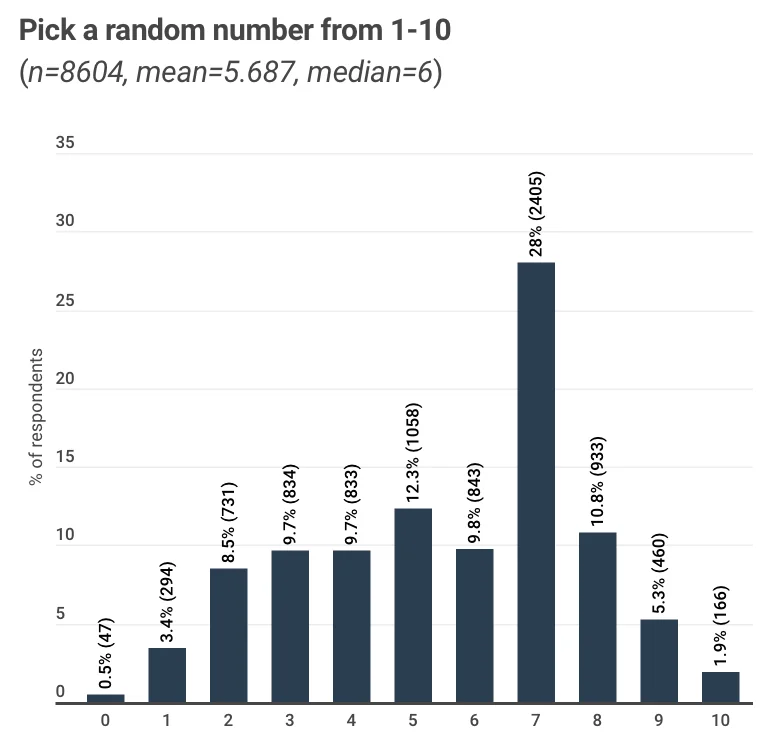

In [41]:
from IPython.display import Image, display

image_path = "reddit-0to10.jpg"  

display(Image(filename=image_path))